<a href="https://colab.research.google.com/github/juyoung524/22-1-Spring-/blob/main/20220504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nltk: Natural Language Tool Kit

Natural Language <-> Artificial Language

사람의 언어에 대한 패키지라고 말하면 너무 광범위하니까 그냥 'nltk'라고 하면 'Text processing'으로 이해하면 될 것 같음 (오늘부터 두어 시간 동안 텍스트에 관련해서 할 것이고, 주 패키지는 nltk이다!)

### Tokenization

text가 긴 하나의 string으로 되어 있을 때, 이게 책 하나일 수도 있고 밑에 나와있는 대로 짧을 수도 있음. 단어 하나하나 수준으로 끊어서 읽는 걸 'token'이라고 함.

끊는다는 개념이 string으로 길게 들고 있는 것이 아니라, list 안에 단어 단어를 넣는 것을 의미함. (tokenization)

* Normalization은 깨끗하게 하는 'cleaning'이라고 이해하면 됨. 동사에 어미가 붙고 명사에 접두사 붙는 것을 분리하거나 청소하는 것을 'normalization'이라고 함

* Stopword: 불용어 / 대명사, 조동사 등은 너무 많이 쓰이는 단어라서 우리가 별로 관심이 없음. 한 소설에서 'the', 'a', 'is'가 몇 번 나왔는지는 별로 관심이 없음.

 --> 너무 자주 나오는 단어들은 분석에 별로 쓸모가 없기 때문에, 그런 것 따로 모아놓기도 함. (불용어 list)

* Collocation: 우리말로 '연어' (대표적으로 숙어) (ex. take care 이런 식으로 붙어서 나올 확률이 놓음. 사람 이름: Michael Smith가 연어가 될 수도 있음)

* Concordance: 큰 corpus가 있다고 할 때, 특정 단어의 용매가 어떻게 되는지 보여질 수 있음. 조동사 would가 큰 corpus에서 어떻게 사용됐는지 보여달라고 하면 편하게 보기 좋게 용매 찾아주는 것을 'concordance'라고 함

* 사실 Text processing에서 가장 중요한 것이 'frequency'임. 어떤 단어가 많이 쌓였는지가 document에 대한 정의를 잘 내려줄 수 있는 것임. '핏쳐'라는 단어가 많이 나왔다고 하면 (특정 단어가 많이 나오면) 어떤 article이라고 분석 가능

* Dictionary: 사전을 정의해 놓는 것. 통으로 불러와서 유용하게 쓸 수 있음

* POS tag: 품사임. 각 품사의 정의와 설명이 밑에 나와 있음. (설명, 예시) 품사를 자동으로 분석해주는 것. Natural language processing의 중요한 요소 중 하나임

* Wordcloud: 위에서 언급한 'frequency'를 기반으로 해서 visualize해주는 것임. 어떤 article에서 '대선'이라는 단어가 많이 나왔을 거고, 대선이 끝나고 나서는 '대선'이라는 말의 빈도가 확 줄어들었을 것임. frequency에 기반하여 글자 크기에 차이 두는 것이 wordcloud임

* Regular expression: 규칙을 표현하는 것 의미함. 어떤 Text에 조작 가하고 싶을 때 어떤 규칙으로 해서 찾아내는 것임. (ex. 어떤 word file이 있을 때, 한글이든 M/S word에서 불러와서 search할 때 단순히 어떤 단어 찾아라! 할 수 있지만, 구글에서 찾을 때 여러 가지 표시를 해서 여러분들이 search option을 다양하게 할 수 있음. 훨씬 더 여러분이 할 수 있는 모든 것을 규칙으로 담아서 search할 수 있는 것임



NLP 쪽으로 공부를 확실히 해 둔다면, 취업 시장에서 도움이 많이 될 것임.

그 중에서도 가장 한가운데 있는 기능이 바로 'regular expressions' 여기 있는 기능 잘 활용해서 어떻게 텍스트 처리하고... 하는 기능만 잘 하면 취업에 굉장히 도움이 많이 됨.

In [1]:
import nltk

In [2]:
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")
file.close()

우리 class 사이트에 '죄와벌'이라는 텍스트를 따놓으심 (Crime_punishment) 이걸 url로 해서 가져온 것 실행하면 무슨 일이 생기냐면, 저 부분이 copy되어서 나옴 (crime_punishment)

우리 서버에 내 계정 current folder에 나옴.

밑게 꺼는 open해서 이 파일을 불러오고, 파일을 이렇게 쓰면 text에 모든 text가 들어와 있는 것임. (죄와벌이 싹 다 들어옴)

text에다가 ~.txt에 들어온 모든 것을 string으로 가져옴. 모든 텍스트를 이 'text'라는 변수에 'string'으로 가져옴

이렇게도 할 수 있지만, 

In [3]:
# or copy/pase text here
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

copy, paste해서 text 가져올 수도 있음.

In [4]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()

이건 뭐냐면 우리가 어떤 'text'라는 variable에 string이 저런 식으로 들어 있다면, 우리가 저런 식으로 파일을 아웃풋으로 만들 수도 있는 것임

tmp.txt 이런 식으로 아예 'write out' 할 수가 있음

이 파일 속에는 금방 우리가 'text'라고 해서 금방 넣었던 내용이 담긴 텍스트파일이 담김

**0504 수업- 5:17부터 다시 듣기**

In [5]:
text.split()

['Here’s',
 'to',
 'the',
 'crazy',
 'ones,',
 'the',
 'misfits,',
 'the',
 'rebels,',
 'the',
 'troublemakers,',
 'the',
 'round',
 'pegs',
 'in',
 'the',
 'square',
 'holes.',
 'The',
 'ones',
 'who',
 'see',
 'things',
 'differently',
 '—',
 'they’re',
 'not',
 'fond',
 'of',
 'rules.',
 'You',
 'can',
 'quote',
 'them,',
 'disagree',
 'with',
 'them,',
 'glorify',
 'or',
 'vilify',
 'them,',
 'but',
 'the',
 'only',
 'thing',
 'you',
 'can’t',
 'do',
 'is',
 'ignore',
 'them',
 'because',
 'they',
 'change',
 'things.',
 'They',
 'push',
 'the',
 'human',
 'race',
 'forward,',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'as',
 'the',
 'crazy',
 'ones,',
 'we',
 'see',
 'genius,',
 'because',
 'the',
 'ones',
 'who',
 'are',
 'crazy',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'change',
 'the',
 'world,',
 'are',
 'the',
 'ones',
 'who',
 'do.']

In [9]:
' '.join(text.split())

'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. You can quote them, disagree with them, glorify or vilify them, but the only thing you can’t do is ignore them because they change things. They push the human race forward, and while some may see them as the crazy ones, we see genius, because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [10]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

### Normalization  
**Stemming** 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

**Lemmatization** 표제어(기본 사전형) 추출.


In [12]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

['here',
 's',
 'to',
 'the',
 'crazi',
 'one',
 'the',
 'misfit',
 'the',
 'rebel',
 'the',
 'troublemak',
 'the',
 'round',
 'peg',
 'in',
 'the',
 'squar',
 'hole',
 'the',
 'one',
 'who',
 'see',
 'thing',
 'differ',
 'they',
 're',
 'not',
 'fond',
 'of',
 'rule',
 'you',
 'can',
 'quot',
 'them',
 'disagre',
 'with',
 'them',
 'glorifi',
 'or',
 'vilifi',
 'them',
 'but',
 'the',
 'onli',
 'thing',
 'you',
 'can',
 't',
 'do',
 'is',
 'ignor',
 'them',
 'becaus',
 'they',
 'chang',
 'thing',
 'they',
 'push',
 'the',
 'human',
 'race',
 'forward',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'as',
 'the',
 'crazi',
 'one',
 'we',
 'see',
 'geniu',
 'becaus',
 'the',
 'one',
 'who',
 'are',
 'crazi',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'chang',
 'the',
 'world',
 'are',
 'the',
 'one',
 'who',
 'do']

In [13]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

['her',
 's',
 'to',
 'the',
 'crazy',
 'on',
 'the',
 'misfit',
 'the',
 'rebel',
 'the',
 'troublemak',
 'the',
 'round',
 'peg',
 'in',
 'the',
 'squ',
 'hol',
 'the',
 'on',
 'who',
 'see',
 'thing',
 'diff',
 'they',
 're',
 'not',
 'fond',
 'of',
 'rul',
 'you',
 'can',
 'quot',
 'them',
 'disagr',
 'with',
 'them',
 'glor',
 'or',
 'vil',
 'them',
 'but',
 'the',
 'on',
 'thing',
 'you',
 'can',
 't',
 'do',
 'is',
 'ign',
 'them',
 'becaus',
 'they',
 'chang',
 'thing',
 'they',
 'push',
 'the',
 'hum',
 'rac',
 'forward',
 'and',
 'whil',
 'som',
 'may',
 'see',
 'them',
 'as',
 'the',
 'crazy',
 'on',
 'we',
 'see',
 'geni',
 'becaus',
 'the',
 'on',
 'who',
 'ar',
 'crazy',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'chang',
 'the',
 'world',
 'ar',
 'the',
 'on',
 'who',
 'do']

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['Here',
 's',
 'to',
 'the',
 'crazy',
 'one',
 'the',
 'misfit',
 'the',
 'rebel',
 'the',
 'troublemaker',
 'the',
 'round',
 'peg',
 'in',
 'the',
 'square',
 'hole',
 'The',
 'one',
 'who',
 'see',
 'thing',
 'differently',
 'they',
 're',
 'not',
 'fond',
 'of',
 'rule',
 'You',
 'can',
 'quote',
 'them',
 'disagree',
 'with',
 'them',
 'glorify',
 'or',
 'vilify',
 'them',
 'but',
 'the',
 'only',
 'thing',
 'you',
 'can',
 't',
 'do',
 'is',
 'ignore',
 'them',
 'because',
 'they',
 'change',
 'thing',
 'They',
 'push',
 'the',
 'human',
 'race',
 'forward',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'a',
 'the',
 'crazy',
 'one',
 'we',
 'see',
 'genius',
 'because',
 'the',
 'one',
 'who',
 'are',
 'crazy',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'change',
 'the',
 'world',
 'are',
 'the',
 'one',
 'who',
 'do']

### Stopword

In [15]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Here', 's', 'to', 'the', 'crazy', 'ones', 'the', 'misfits', 'the', 'rebels', 'the', 'troublemakers', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', 'The', 'ones', 'who', 'see', 'things', 'differently', 'they', 're', 'not', 'fond', 'of', 'rules', 'You', 'can', 'quote', 'them', 'disagree', 'with', 'them', 'glorify', 'or', 'vilify', 'them', 'but', 'the', 'only', 'thing', 'you', 'can', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', 'They', 'push', 'the', 'human', 'race', 'forward', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', 'we', 'see', 'genius', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', 'are', 'the', 'ones', 'who', 'do']
['Here', 'crazy', 'ones', 'misfits', 'rebels', 'troublemakers', 'round', 'pegs', 'square', 'holes', 'The', 'one

### Collocation, Concordance

In [ ]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

In [27]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2)

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [28]:
nltk.Text(words).concordance('Emma', 79, 10)

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


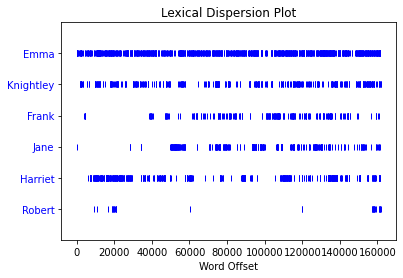

In [29]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [30]:
# Distributional similarity: 
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


'similar': Emma랑 분포상으로 어떤 게 유사한가? 분포상으로 양옆에 나올 단어를 찾아라. Emma가 여자니까 'she'랑 비슷하게 위치하고 있음. 동사는 별로 없고 대부분 대명사인 것을 확인 가능

In [31]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


Common context라고 두 개 넣어 놓음. Specified된 word 2개 넣어 놓으면, 이 두 개가 나타나는 context를 (양쪽 단어) 말해라!

이것도 빈도수별로 확률적으로 높은 것부터 나옴.

### Frequency distribution, Frequency plot

어떤 단어들이 가장 frequent하게 나오는가?

In [16]:
fd = nltk.FreqDist(words).most_common(20)
fd

[('ones', 5),
 ('crazy', 3),
 ('see', 3),
 ('things', 2),
 ('change', 2),
 ('Here', 1),
 ('misfits', 1),
 ('rebels', 1),
 ('troublemakers', 1),
 ('round', 1),
 ('pegs', 1),
 ('square', 1),
 ('holes', 1),
 ('The', 1),
 ('differently', 1),
 ('fond', 1),
 ('rules', 1),
 ('You', 1),
 ('quote', 1),
 ('disagree', 1)]

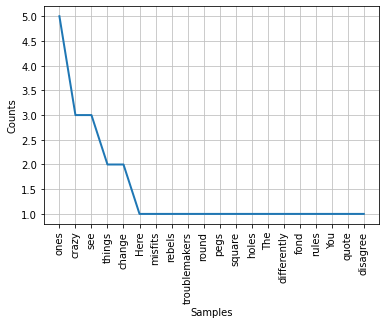

In [17]:
nltk.Text(words).plot(20)

똑같은 거 plot해서 볼 수도 있음

### Dictionary

다양한 언어의 dictionary 제공함. 

통으로 받아올 수 있음

어떤 dictionary가 있는지 찾아보고, 불러올 수 있음. 그래서 그 dictionary가 포함하고 있는 단어가 몇 개인지도 확인 가능함

In [18]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [19]:
len(nltk.corpus.words.words('en'))

235886

### Extract information (pos tag, named entity)


#### **POS tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

POS tag (Part Of Speech)라고 해서 기본적으로 품사임.

리스트 보면 접속사도 있고, 관사도 있고, 형용사도 있고 다양하게 있음. (소유격...)

이 부분 같이 실행해 보겠습니다!

In [20]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [21]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [23]:
pos

[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbuck', 'NNP')]

In [22]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


In [ ]:
ne

대명사, 전치사, to부정사 등의 품사 정보들이 나와 있음

이런 품사 말고도 다양한 것들에 대한 정보 줄 수 있음 (organization, person, location, date, time, money, GPE 등)

### Wordcloud

이건 'frequency'를 기반으로 하고, 'font size'와 관련이 있음. 조금 다른 패키지를 들고 와야 함. WordCloud에서 'STOPWORDS'를 import해야 함

bible 가져오면 text에 담길 것임. Text에 string으로 성경이 담겨 있을 것임

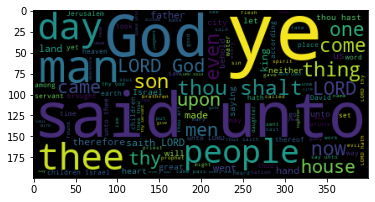

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)

**여기 잠시 다시 듣기 (5:54)**

### Regular expression

In [ ]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])